In [53]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.pys

# Exercise 2

In [54]:
from thinkdsp import read_wave
wave = read_wave('wav1.wav')
wave.make_audio

<bound method Wave.make_audio of <thinkdsp.Wave object at 0x1319c4d30>>

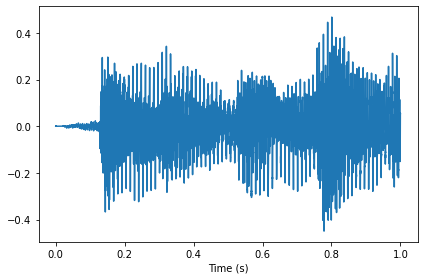

In [55]:
from thinkdsp import decorate
start = 0
duration = 1
segment = wave.segment(start,duration)
segment.plot()
decorate(xlabel='Time (s)')

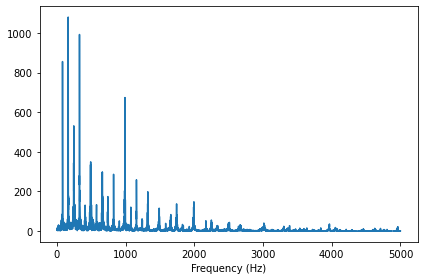

In [56]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

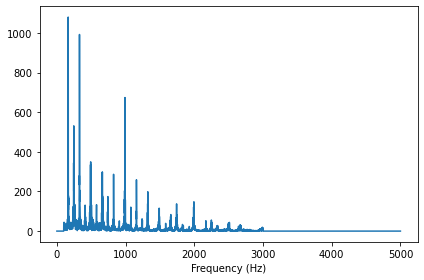

In [57]:
spectrum.low_pass(3000)
spectrum.high_pass(100)
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

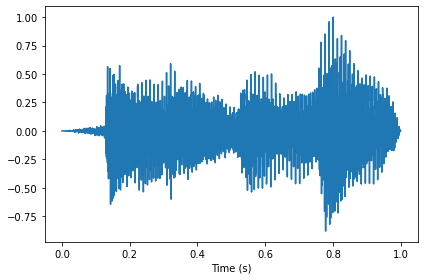

In [58]:
filitered = spectrum.make_wave()
filitered.normalize()
filitered.apodize()
filitered.plot()
decorate(xlabel='Time (s)')

In [59]:
filitered.write('wav2.wav')

Writing wav2.wav


# Exercise 3

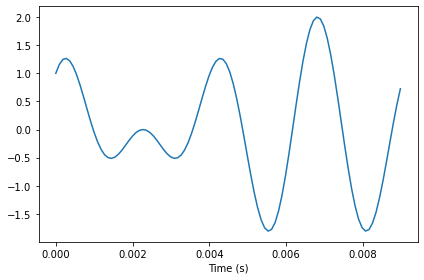

In [60]:
from thinkdsp import CosSignal, SinSignal
cos_sig = CosSignal(freq=440,amp=1,offset=0)
sin_sig = SinSignal(freq=330,amp=1,offset=0)
mix_sig = sin_sig+cos_sig
mix_sig.plot()
decorate(xlabel='Time (s)')

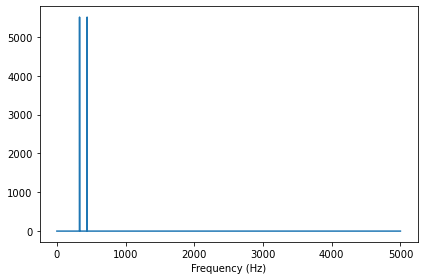

In [61]:
wave = mix_sig.make_wave()
segment = wave.segment(0,1)
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

In [62]:
wave.write('wav3.wav')

Writing wav3.wav


/Users/toby/MEGA/CGU/110-2 Signal and System/code/thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


# Exercise 4

In [71]:
def stretch(wave,speedup_factor):
    wave.ts = wave.ts[:len(wave.ts)//speedup_factor]
    wave.framerate = wave.framerate*speedup_factor
    return wave

In [70]:
wave = read_wave('wav1.wav')
wave = stretch(wave,2)
wave.write('wav1_2.wav')

Writing wav1_2.wav
